In [8]:
pwd

u'/Users/Mukisa/Desktop/iPythonExample'

In [10]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#input file with all points in uganda
filename = '/Users/Mukisa/Desktop/iPythonExample/code/Pest&Disease_2008_14.csv'
datadf=pd.read_csv(filename)
data=datadf[['lon','lat']]#.as_matrix()

In [69]:
#testdatadf=pd.DataFrame(data=data,columns=['lon','lat'])
#testdata=testdatadf[['lon','lat']].as_matrix()

#historical set
filename2 = '/Users/Mukisa/Desktop/iPythonExample/code/Pest&Disease_2008_14.csv'
traindatadf= pd.read_csv(filename2)
traindatadf.head()


#Data cleaning to remove unknown locations
traindatadf=traindatadf[traindatadf['lon']>0]
traindatadf.shape

invert = lambda x: 1 if x==0 else 0

# traindatadf['somecount']=traindatadf['CBSD_Incidence']#.apply(invert)

#I give X two inputs for Latitude & longitude, and Y the input set 
X=np.array(traindatadf[['lon','lat','Year_of_survey']])
Y=np.array(traindatadf['CMD Incidence'])[:,None]#.as_matrix()#[:,None]
print X.shape, Y.shape

ix = np.random.permutation(np.arange(X.shape[0]))
X=X[ix[0:800],]
Y=Y[ix[0:800],]

(5218, 3) (5218, 1)


In [39]:
import GPy
?GPy.kern.RBF

In [149]:
%matplotlib inline
import GPy
import numpy as np
import matplotlib.pyplot

#it iterates these number of times until it stops
max_iters=1000

#Give the kernel 2 input dimensions 
input_dim=X.shape[1]
rbf_space = GPy.kern.RBF(2, active_dims = np.array([1,0]), name = 'space')
rbf_time = GPy.kern.MLP(1, active_dims = np.array([2]), name = 'time')
#rbf_time[".*lengthscale"].constrain_fixed(.3)
#rbf_time[".*variance"].constrain_fixed(1)

rbf =rbf_space + rbf_time

# create simple GP Model
#     m = GPy.models.SparseGPRegression(X, Y, kernel=rbf, num_inducing=num_inducing)

m = GPy.models.GPRegression(X, Y, kernel=rbf)

# contrain all parameters to be positive (but not inducing inputs)
#m['.*len'] = .04333
#m['.*space.len'] = .0006333  #0.008333
m['.*space.len'].constrain_bounded(.1,.9)
m['.*noise'] = .0001
#m['.*time.len'] = .1
m.checkgrad()

# optimize, run the model & set parameters
m.optimize('tnc', messages=1, max_iters=max_iters)

# plot
#m.plot()

{'contour': <matplotlib.contour.QuadContourSet at 0x11cfc97d0>}

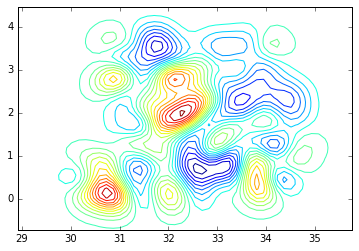

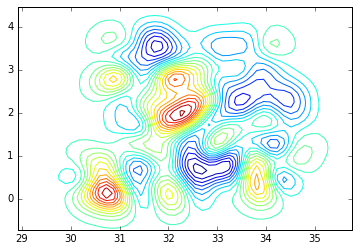

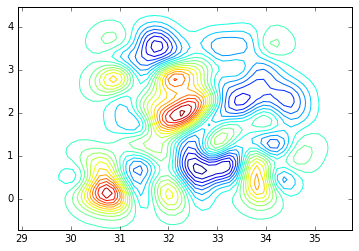

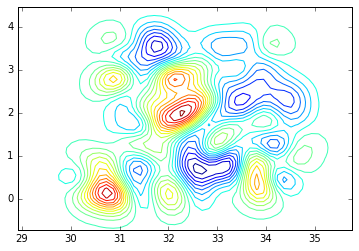

In [150]:
plt.figure(figsize=(12,10))
m.plot(fixed_inputs = [(2, 2008)], plot_training_data = False)

m.plot(fixed_inputs = [(2, 2009)], plot_training_data = False)
m.plot(fixed_inputs = [(2, 2011)], plot_training_data = False)
m.plot(fixed_inputs = [(2, 2013)], plot_training_data = False)


#m.plot()
#plt.xlim([29,35])
#plt.ylim([-1.5,4])
#cbar_ax = fig.add_axes([0.85,0.3,0.02,0.45]) #[0.85, 0.2, 0.05, 0.7]) #left bottom width height
#plt.colorbar(im, cmap =cm.YlOrRd, cax = cbar_ax);

In [151]:
aux = np.meshgrid(np.arange(1,3), np.arange(4,6))
aux[0]
#aux[1]

array([[1, 2],
       [1, 2]])

In [145]:
sgrid = np.meshgrid(np.linspace(29.5,35.5,100),np.linspace(-1,4.5,100))

In [146]:
pred_lon = sgrid[0].flatten()[:,None]
pred_lat = sgrid[1].flatten()[:,None]
X_pred = np.hstack([pred_lon, pred_lat,np.ones_like(pred_lon)*2015])
mean_pred, var_pred = m.predict(X_pred)

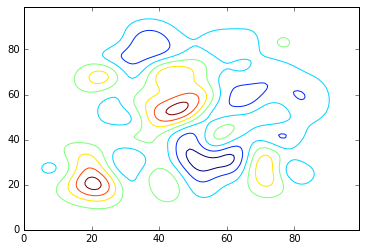

In [148]:
plt.contour(mean_pred.reshape(100,100))

In [8]:
#testing the model
meanx,var = m.predict(testdata)
ZZ = meanx
XX = testdata[:,0][:,None]
YY = testdata[:,1][:,None]

In [152]:
Y

array([[  66.7],
       [   6.7],
       [  56.7],
       [   0. ],
       [  36.7],
       [  16.7],
       [   0. ],
       [   0. ],
       [   6.7],
       [  36.7],
       [   0. ],
       [  10. ],
       [   3.3],
       [  26.7],
       [  20. ],
       [  33.3],
       [  10. ],
       [  36.7],
       [   0. ],
       [   3.3],
       [  66.7],
       [  86.7],
       [   0. ],
       [   6.7],
       [   0. ],
       [   0. ],
       [  13.3],
       [   3.3],
       [   3.3],
       [   0. ],
       [   0. ],
       [  30. ],
       [   0. ],
       [   0. ],
       [   0. ],
       [   0. ],
       [   0. ],
       [   0. ],
       [   6.7],
       [   0. ],
       [   0. ],
       [   0. ],
       [   0. ],
       [   0. ],
       [  46.7],
       [  53.3],
       [   0. ],
       [   0. ],
       [  80. ],
       [   0. ],
       [  46.7],
       [ 100. ],
       [  90. ],
       [   0. ],
       [   3.3],
       [  13.3],
       [   6.7],
       [  26.7],
       [   0. 

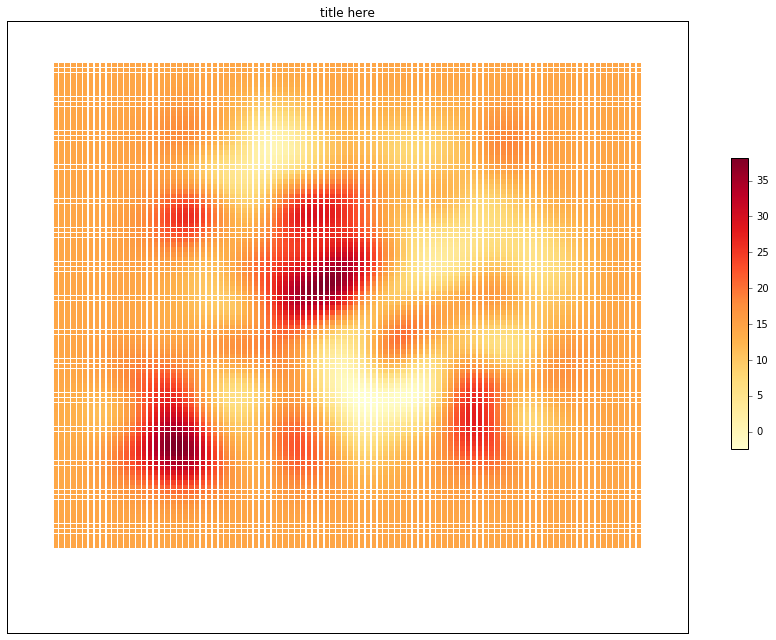

In [156]:
from matplotlib import cm
import matplotlib as mpl
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator

matplotlib.rcParams['xtick.direction'] = 'out'
matplotlib.rcParams['ytick.direction'] = 'out'

fig, ax = plt.subplots(nrows = 1, ncols = 1,figsize=(12,9), dpi=100)

im = ax.scatter(pred_lon, pred_lat, c = mean_pred, cmap = cm.YlOrRd, edgecolor = '',marker='s')
ax.set_xticks([])
ax.set_yticks([])
titlex ='title here'
fontsize=12
ax.set_title(titlex, fontsize= fontsize)

fig.tight_layout()

fig.subplots_adjust(right = 0.80)
#norm = mpl.colors.Normalize(vmin=ymin, vmax=ymax)
cbar_ax = fig.add_axes([0.85,0.3,0.02,0.45]) #[0.85, 0.2, 0.05, 0.7]) #left bottom width height
plt.colorbar(im, cmap =cm.YlOrRd, cax = cbar_ax);

In [18]:
ZZ.shape

(15976, 1)

In [153]:
p = Y/100

In [155]:
np.log(1/(1-p))

array([[ 1.09961279],
       [ 0.06935008],
       [ 0.83701755],
       [ 0.        ],
       [ 0.45728486],
       [ 0.18272164],
       [ 0.        ],
       [ 0.        ],
       [ 0.06935008],
       [ 0.45728486],
       [ 0.        ],
       [ 0.10536052],
       [ 0.03355678],
       [ 0.31060958],
       [ 0.22314355],
       [ 0.40496523],
       [ 0.10536052],
       [ 0.45728486],
       [ 0.        ],
       [ 0.03355678],
       [ 1.09961279],
       [ 2.01740615],
       [ 0.        ],
       [ 0.06935008],
       [ 0.        ],
       [ 0.        ],
       [ 0.1427163 ],
       [ 0.03355678],
       [ 0.03355678],
       [ 0.        ],
       [ 0.        ],
       [ 0.35667494],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.06935008],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.62923385],
       [ 0